In [3]:
import os 
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import igraph as ig
from ts2vg import NaturalVG
from scipy.spatial.distance import euclidean
from networkx import to_numpy_array
from community import community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt

from Functions import singlechannel_clustering as sc

(1219, 150)
(1219, 150)
(1219, 150)
(1219, 1219)
(1219, 1219)


C:\Users\ianja\AppData\Local\Temp\ipykernel_3184\2022889160.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis', max(partition.values()) + 1)


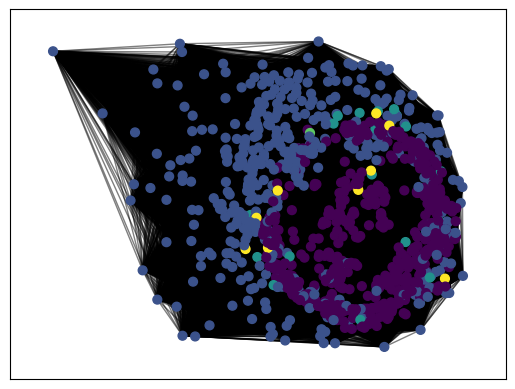

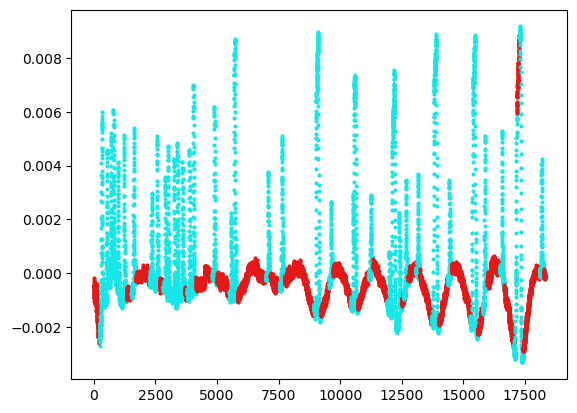

In [4]:
singlechannel_timeseries = []
datadir = "Singlechannel\PreviousData_v2\\"
for each in os.listdir(datadir):
    singlechannel_timeseries.append(list(scipy.io.loadmat(datadir+each)["X"][0]))

TIMESTEP = 150
OVERLAP = 135
TS = singlechannel_timeseries[0]
TRUNCATED = len(TS) % TIMESTEP

weightedGraph = sc.generate_similiarity_matrix(TS, TIMESTEP, OVERLAP)
partition = sc.generate_partitions(weightedGraph)
majority_partition = sc.majority_partition(partition, TS, TIMESTEP, OVERLAP)
colors = sc.contrasting_colors(len(set(majority_partition.values())))

# draw the weighted graph
pos = nx.spring_layout(weightedGraph) 
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(weightedGraph, pos, partition.keys(), node_size=40,
                    cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(weightedGraph, pos, alpha=0.5)
plt.show()

for i in range(len(TS) - TRUNCATED):
    plt.plot(i, TS[i], marker='o', markersize=2, color=colors[majority_partition[i]])

